## LSTM
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequence data.  
Key challenges standard RNNs face are vanishing and exploding gradients during backpropagation, which limits learning long sequences.  
LSTMs address this by using a memory cell and gating mechanisms (input, forget, output gates) to control information flow, enabling the network to maintain relevant information across time steps.

LSTM units:  
- **Cell state (memory)** that carries long-term information.  
- **Forget gate** to decide what information to discard.  
- **Input gate** to decide what new information to store.  
- **Output gate** to decide what to output.  

LSTMs are widely used in time series forecasting, language modeling, speech recognition, and many other sequential tasks.


In [1]:
## Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
  X = []
  y = []
  x_vals = np.linspace(0, 100, total_samples+seq_length)
  sine_wave = np.sin(x_vals)

  for i in range(total_samples):
    X.append(sine_wave[i:i+seq_length])
    y.append(sine_wave[i+seq_length])

  X = np.array(X)
  y = np.array(y)
  return X,y
  return X, y

# Prepare the data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input Shape: ", X.shape)
print("Output Shape: ", y.shape)

Input Shape:  (1000, 50)
Output Shape:  (1000,)


In [3]:
# Build the LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate = 0.001), loss='mse')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.4711 - val_loss: 0.1514
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0856 - val_loss: 0.0022
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.2522e-04 - val_loss: 4.7745e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.9436e-04 - val_loss: 2.0704e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.8727e-04 - val_loss: 9.6950e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.0733e-05 - val_loss: 3.8786e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.1719e-05 - val_loss: 2.1584e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.8406e-05 - val_loss: 1.2944e-05
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.2855e-05 - val_loss: 1.3276e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1707e-05 - val_loss: 1.0278e-05

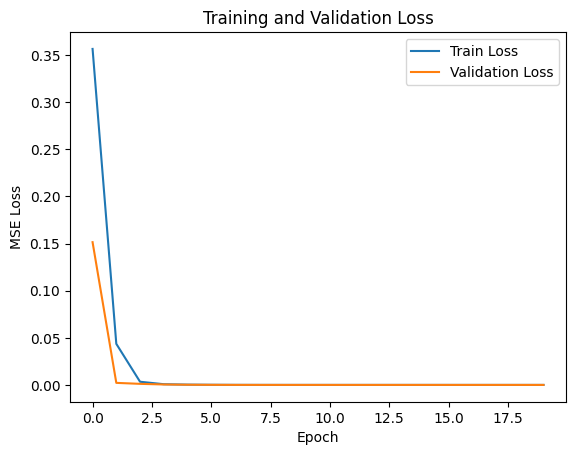

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


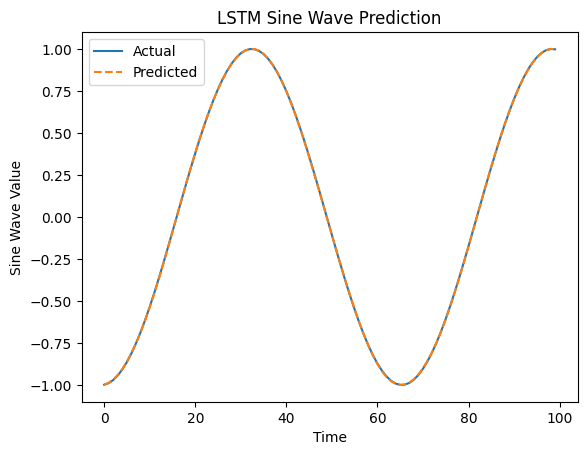

In [6]:
# Make prediction
predictions = model.predict(X[:100])
plt.plot(y[:100], label = 'Actual')
plt.plot(predictions, label = 'Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Time')
plt.ylabel('Sine Wave Value')
plt.legend()
plt.show()
